In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from statsmodels.tsa.stattools import adfuller

In D:\ProgramFiles\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\ProgramFiles\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\ProgramFiles\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\ProgramFiles\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\ProgramFiles\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was 

In [2]:
df = pd.read_csv("data_final.csv")

In [3]:
df = df[["y7"]]

In [4]:
df

y7
0    -2.442986
1    -1.233039
2    -0.160485
3     0.923501
4     0.951432
...        ...
1495  1.389197
1496 -0.165867
1497 -0.531916
1498  0.007447
1499 -0.331146

[1500 rows x 1 columns]

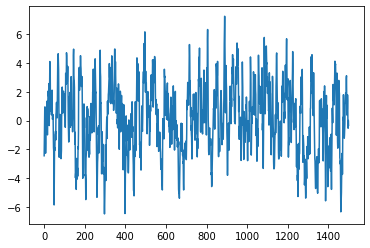

<Figure size 1600x1600 with 0 Axes>

In [5]:
plt.plot(df.index, df.y7)
#plt.figure(figsize=(100, 6))
figure(figsize=(20, 20), dpi=80)
plt.show()
#grafik genişletilecek

In [6]:
#BURADA ACF ACF grafiğine baktığımızda geçmiş şokların etkisinin azaldığı, geçmişin hızla unutulduğu  görülmektedir. 
#Buna göre durağan olduğu söylenebilir. ADF birim kök testi ile durağan olup olmadığı belirlenecektir.

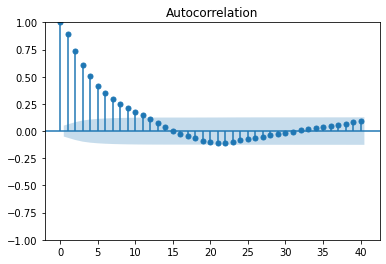

In [7]:
sm.graphics.tsa.plot_acf(df.values.squeeze(), lags=40)
plt.show()

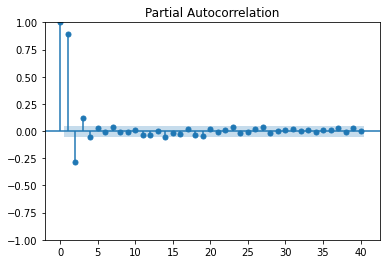

In [8]:
sm.graphics.tsa.plot_pacf(df.values.squeeze(), lags=40, method="ywm")
plt.show()

In [9]:
# ACF VE PACF GRAFİKLERİNE KORELOGRAM DENİLİYOR.

In [10]:
# Önce grafiklere bakıldı. 

In [11]:
result = adfuller(df['y7'])
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


Augmented Dickey-Fuller Test:
ADF Test Statistic : -10.463639227184721
p-value : 1.3390390255367922e-18
#Lags Used : 3
Number of Observations Used : 1496
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [12]:
#STATIONARY OLUP OLMAMASI ARMA - ARIMA MI KULLANILACAĞINI GÖSTERİR. 

In [13]:
#HO HİPOTEZİ REDDEDİLDİĞİ İÇİN BİRİM KÖK YOK. DATA STATİONARY DİYORUZ. 

In [14]:
#ADF TESTİNİN SONUCU OLARAK R'DA 3 TANE TİP GELİYOR. 
#TİP1, TİP2 VE TİP3 ÇALIŞILACAK

In [15]:
#DF TESTİ YOK.ÇÜNKÜ ADF TESTİ DF'Yİ KAPSIYOR. 

In [16]:
#Ljung-Box Testi: zaman serisi olup olmadığnı anlamak için yapılacak, incelenecek

In [17]:
res = sm.tsa.ARMA(df["y7"],(1,1)).fit(disp=-1)
sm.stats.acorr_ljungbox(res.resid, lags=[10], return_df=True)

AttributeError: module 'statsmodels.tsa.api' has no attribute 'ARMA'

In [18]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [19]:
acorr_ljungbox(df["y7"], lags=[20], return_df=True)

lb_stat  lb_pvalue
20  3846.710962        0.0

In [20]:
# BAZI KAYNAKLARDA HO HİPOTEZİ SERİ RANDOM'DUR, ZAMAN SERİSİ DEĞİLDİR DİYOR:
https://www.itl.nist.gov/div898/software/dataplot/refman1/auxillar/ljungbox.htm
#SANIRIM ÖDEV RAPORUNDA DA YANLIŞ VAR. ÇIKAN DEĞER P VALUE'DAN BÜYÜK OLARAK GÖSTERİLMİŞ. 

SyntaxError: invalid syntax (<ipython-input-20-8b8225632446>, line 2)

In [21]:
### R'da x^2 değeri burada lb_stat olarak geçiyor. p value %5, anlamlılık düzeyinden daha az olduğu için bu datada zaman
### serisi vardır diyebiliriz.

#ZAMAN SERİSİ OLDUĞU İÇİN ARMA MODELİ KULLANILABİLİYOR. 
#Akaike Information Criterion

In [22]:
import pmdarima as pmd

def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              trace=True)
    return autoarima_model

In [23]:
arima_model = arimamodel(df["y7"])
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4290.887, Time=0.73 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=6824.332, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4445.280, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=5389.098, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6832.453, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=4291.909, Time=0.47 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=4291.987, Time=0.35 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=4821.508, Time=0.65 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=4317.112, Time=0.17 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=4293.593, Time=1.31 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4289.699, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5394.882, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4443.765, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4290.677, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1500
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -2141.849
Date:                Sat, 22 Oct 2022   AIC                           4289.699
Time:                        13:35:12   BIC                           4305.639
Sample:                             0   HQIC                          4295.637
                               - 1500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8230      0.017     48.573      0.000       0.790       0.856
ma.L1          0.3769      0.027     13.754      0.000       0.323       0.431
sigma2         1.0168      0.038     26.765      0.000       0.942       1.091
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 1.42
Prob(Q):                              0.73   Prob(JB):                         0.49
Heteroskedasticity (H):               1.02   Skew:                             0.06
Prob(H) (two-sided):                  0.81   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
y <- arima.sim(model=list(ar=0.9999), n=1000) #durağan olmayan time series olusturdu

NameError: name 'y' is not defined

In [25]:
df.shape

(1500, 1)

In [ ]:
df

In [ ]:
df.head()